## KNN 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df=pd.read_csv("mushroom.csv")

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
x=df.drop('class',axis = 1)
y=df['class']

In [7]:
cols=['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
      'gill-spacing','gill-size','gill-color','stalk-shape', 'stalk-root', 
      'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring',
         'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
         'ring-type', 'spore-print-color', 'population', 'habitat']


In [8]:
# Convert the data into numeric form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
     x[col]=le.fit_transform(x[col])
y=le.fit_transform(y)
x.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [10]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predict=knn.predict(x_test)
y_predict

array([0, 1, 1, ..., 1, 0, 0])

Compare the performance of KNN and Naive Bayes on a dataset of your choice with respect to following evaluation metrics.
1. Accuracy
2. Precision
3. Recall
4. F Measure

###### TP = 'True Positives', TN = 'True Negatives' , FP = 'False Positive' , FN = 'False Negative'

In [11]:
knn_accuracy=accuracy_score(y_test,y_predict)
knn_accuracy

0.9954881050041017

In [12]:
knn=precision_recall_fscore_support(y_test, y_predict, average='binary')
knn

(0.9915966386554622, 0.9991532599491956, 0.9953606073386756, None)

In [13]:
confusion_matrix_knn = pd.crosstab(y_test , y_predict, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_knn

Predicted,0,1
Actual,,
0,1247,10
1,1,1180


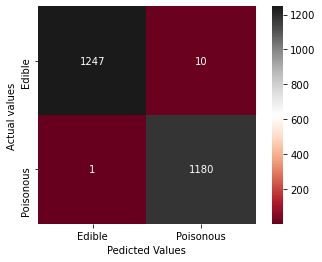

In [26]:
output=['Edible','Poisonous']
sns.heatmap(confusion_matrix_knn,square=True, annot=True,cmap="RdGy",xticklabels=output,yticklabels=output,fmt=".0f")
plt.ylabel("Actual values");
plt.xlabel("Pedicted Values");

In [15]:
# classification report
report=classification_report(y_test,y_predict,target_names=['Edible','Poisonous'],output_dict=True)
report

{'Edible': {'precision': 0.999198717948718,
  'recall': 0.9920445505171042,
  'f1-score': 0.9956087824351297,
  'support': 1257},
 'Poisonous': {'precision': 0.9915966386554622,
  'recall': 0.9991532599491956,
  'f1-score': 0.9953606073386756,
  'support': 1181},
 'accuracy': 0.9954881050041017,
 'macro avg': {'precision': 0.9953976783020901,
  'recall': 0.9955989052331499,
  'f1-score': 0.9954846948869027,
  'support': 2438},
 'weighted avg': {'precision': 0.9955161684633468,
  'recall': 0.9954881050041017,
  'f1-score': 0.9954885630795463,
  'support': 2438}}

## Naive Bayes

In [16]:
xn_train,xn_test,yn_train,yn_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
model_nominal = CategoricalNB()
model_nominal.fit(x,y)


CategoricalNB()

In [18]:
# Make a prediction
y_pred_nominal = model_nominal.predict(xn_test)
y_pred_nominal

array([0, 1, 1, ..., 1, 0, 0])

In [19]:
# Evaluate the model using accuracy score
NB_accuracy = accuracy_score(yn_test,y_pred_nominal)*100
NB_accuracy

95.11894995898277

In [20]:
naive=precision_recall_fscore_support(yn_test, y_pred_nominal, average='binary')
naive

(0.9953358208955224, 0.903471634208298, 0.9471815357301375, None)

In [21]:
confusion_matrix_na = pd.crosstab(yn_test , y_pred_nominal, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_na

Predicted,0,1
Actual,,
0,1252,5
1,114,1067


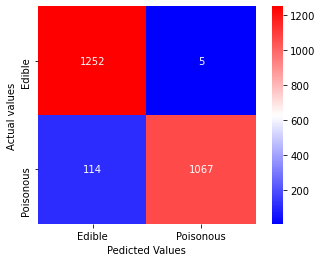

In [32]:
output=['Edible','Poisonous']
sns.heatmap(confusion_matrix_na,square=True, annot=True,cmap="bwr",xticklabels=output,yticklabels=output,fmt=".0f")
plt.ylabel("Actual values");
plt.xlabel("Pedicted Values");

In [23]:
# classification report
report2=classification_report(yn_test,y_pred_nominal, output_dict=True)
report2

{'0': {'precision': 0.9165446559297218,
  'recall': 0.9960222752585521,
  'f1-score': 0.9546321006481128,
  'support': 1257},
 '1': {'precision': 0.9953358208955224,
  'recall': 0.903471634208298,
  'f1-score': 0.9471815357301375,
  'support': 1181},
 'accuracy': 0.9511894995898277,
 'macro avg': {'precision': 0.9559402384126221,
  'recall': 0.9497469547334251,
  'f1-score': 0.9509068181891251,
  'support': 2438},
 'weighted avg': {'precision': 0.9547121562679541,
  'recall': 0.9511894995898277,
  'f1-score': 0.9510229467645489,
  'support': 2438}}

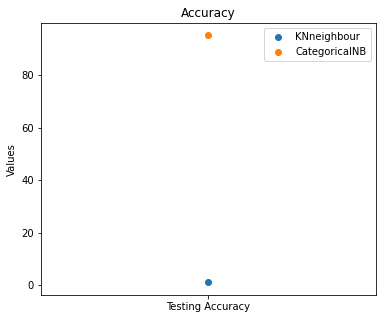

In [33]:
Accuracy=['Testing Accuracy']
Measures=['Precision','Recall','F-Score','Support']
plt.figure(figsize=(6,5))
plt.scatter(Accuracy,knn_accuracy,label="KNneighbour")
plt.scatter(Accuracy,NB_accuracy,label="CategoricalNB")
plt.ylabel("Values")
plt.title("Accuracy")
plt.legend()
plt.show()

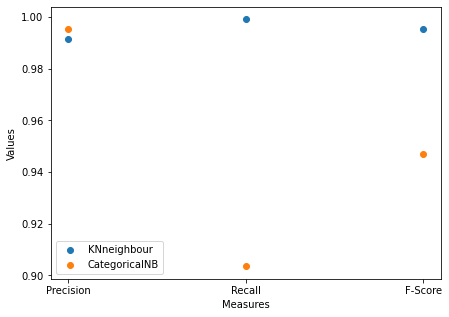

In [25]:
plt.figure(figsize=(7,5))
plt.scatter(Measures,knn,label="KNneighbour")
plt.scatter(Measures,naive,label="CategoricalNB")
plt.xlabel("Measures")
plt.ylabel("Values")
plt.legend()
plt.show()